# Image Processing SS 20 - Assignment - 01

### Deadline is 29.4.2020 at 12:00

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs without errors, when clicking `Kernel` -> `Restart & Run All`.


## Introduction to Python / Numpy

* [Learn Python in 15 minutes](https://learnxinyminutes.com/docs/python3/): We will use Python 3.
* [Numpy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#general-purpose-equivalents)
* [Numpy Quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

## Libraries

We will use the following libraries:

* matplotlib
* numpy
* scipy
* skimage


# Exercise 0 - Setup Development Enviroment - [1 Point]

Find a partner, follow the steps in the [README](https://github.com/BildverarbeitungSS20/Hausaufgaben/blob/master/README.md) and paste a link to your repository and your names into the KVV assignment box. Also include your names inside your solution.
You do not need to upload any files to MyCampus Whiteboard. I will clone your repository.

In [1]:
# display the plots inside the notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import math
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [3]:
from skimage.data import astronaut

In [4]:
img = astronaut()   # Get the image
print(img.shape)    # the dimension of the image
print(img.dtype)    # the image type

(512, 512, 3)
uint8


We have a `(512, 512, 3)` array of unsigned bytes. At `img[x, y]` there are three values for R,G and B.

We will always work with floating point arrays between 0 and 1. 

In [5]:
img = img / 255.

Lets display the image.

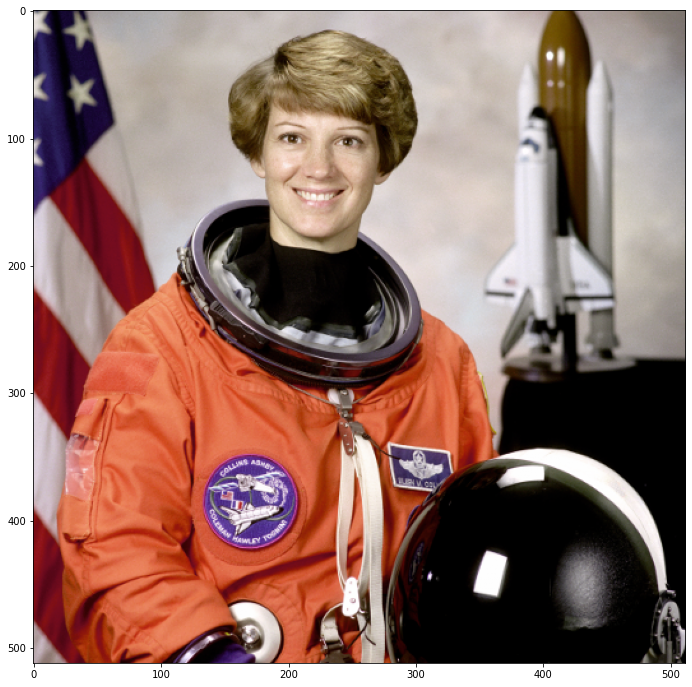

In [6]:
plt.imshow(img)
plt.show()

This is [Eileen Collins](https://en.wikipedia.org/wiki/Eileen_Collins). She was the first astronaut 
 to fly the Space Shuttle through a complete 360-degree pitch maneuver. What an inspiring woman.

## Exercise 1 - Plot -       [1 Point]

Plot the R, G and B channels separately.

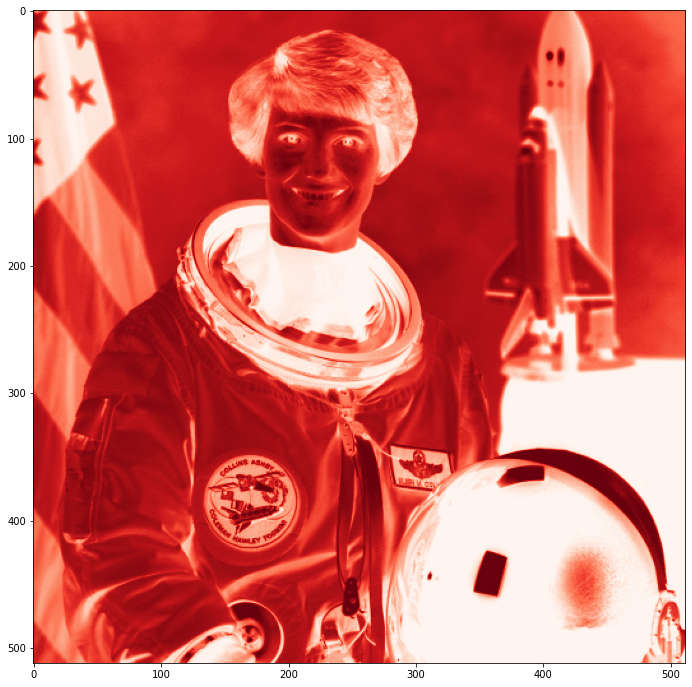

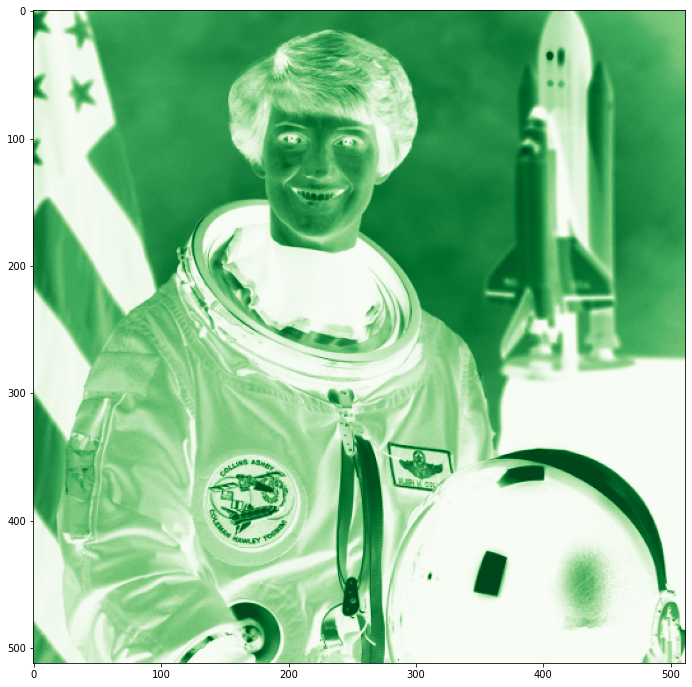

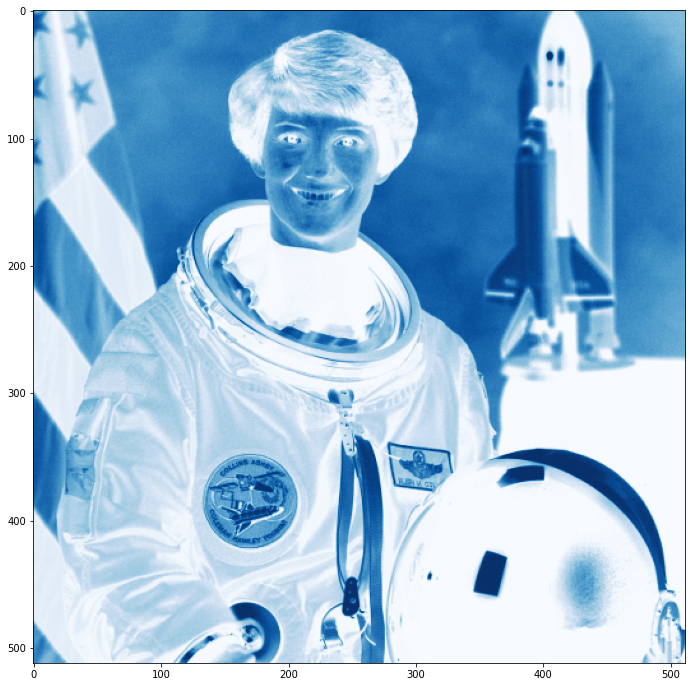

In [7]:
# R Channel
plt.imshow(img[:,:,0], cmap='Reds')
plt.show()
# G Channel
plt.imshow(img[:,:,1], cmap='Greens')
plt.show()
# B Channel
plt.imshow(img[:,:,2], cmap='Blues')
plt.show()

## Exercise 2 - RGB to HSV [6 Points]

Implement the `rgb_to_hsv` and `hsv_to_rgb` functions. Don't use any color conversion functions from a library.


In [8]:
def rgb_to_hsv(x):
    """
    Converts the numpy array `x` from RGB to the HSV. 
    """
    # separating channels
    R = x[:,:,0]
    G = x[:,:,1]
    B = x[:,:,2]
    
    
    # h, s, v = hue, saturation, value 
    # initial arrays for h, s and v filled with 0.0
    # we take R array just as 2D sample for copying the shape
    H = np.full_like(R, 0.0, dtype=np.double)
    S = np.full_like(R, 0.0, dtype=np.double)
    V = np.full_like(R, 0.0, dtype=np.double)
    
    HSV = np.full_like(x, 0.0, dtype=np.double)
 
    # np.max/min and axis=2 creates a 2D matrix
    C_max = np.max(x, axis=2)    # maximum of r, g, b 
    C_min = np.min(x, axis=2)    # minimum of r, g, b 
    Diff = C_max - C_min       # diff of cmax and cmin. 
    
    # Formula:
    # https://www.geeksforgeeks.org/program-change-rgb-color-model-hsv-color-model/
    
    # if cmax and cmax are equal (R=G=B) then h = 0 
    H[np.isclose(C_max, R, 0.0001)] = 0   
        
    # if cmax equal r 
    m = np.isclose(C_max, R, 0.0001)&(Diff!=0)
    H[m] = (60 * ((G[m] - B[m]) / Diff[m]) + 360) % 360
    

    # if cmax equal g 
    m = np.isclose(C_max, G, 0.0001)&(Diff!=0)
    H[m] = (60 * ((B[m] - R[m]) / Diff[m]) + 120) % 360
  
    # if cmax equal b 
    m = np.isclose(C_max, B, 0.0001)&(Diff!=0)
    H[m] = (60 * ((R[m] - G[m]) / Diff[m]) + 240) % 360
    
    # if cmax equal zero 
    S[C_max == 0] = 0
    
    # else
    m = (C_max != 0)
    S[m] = (Diff[m] / C_max[m]) * 100
  
    # compute v 
    V = C_max * 100
    
    # building new 3D picture
    HSV[:,:,0] = H
    HSV[:,:,1] = S
    HSV[:,:,2] = V
    
    return HSV

In [9]:
def hsv_to_rgb(x):
    """
    Converts the numpy array `x` from HSV to the RGB. 
    """
    # Your code here
    new = x.copy()
    
    # based https://de.wikipedia.org/wiki/HSV-Farbraum#Transformation_von_HSV/HSL_und_RGB
    for i in range(0, new.shape[0]):
        for j in range(0, new.shape[1]):
            # S = 0 <=> R = G = B = V
            if math.isclose(x[i,j,1], 0, rel_tol=1e-5):
                new[i,j,0] = x[i,j,2]
                new[i,j,1] = x[i,j,2]
                new[i,j,2] = x[i,j,2]
            else:
                # compute color area
                h = int(math.floor(x[i,j,0]/60))
                # helper values
                f = x[i,j,0]/60 - h
                p = x[i,j,2] * (1 - x[i,j,1])
                q = x[i,j,2] * (1 - x[i,j,1] * f)
                t = x[i,j,2] * (1 - x[i,j,1] * (1 - f))
                
                if h == 0 or h == 6:
                    new[i,j,0] = x[i,j,2]
                    new[i,j,1] = t
                    new[i,j,2] = p
                elif h == 1:
                    new[i,j,0] = q
                    new[i,j,1] = x[i,j,2]
                    new[i,j,2] = p
                elif h == 2:
                    new[i,j,0] = p
                    new[i,j,1] = x[i,j,2]
                    new[i,j,2] = t
                elif h == 3:
                    new[i,j,0] = p
                    new[i,j,1] = q
                    new[i,j,2] = x[i,j,2]
                elif h == 4:
                    new[i,j,0] = t
                    new[i,j,1] = p
                    new[i,j,2] = x[i,j,2]
                elif h == 5:
                    new[i,j,0] = x[i,j,2]
                    new[i,j,1] = p
                    new[i,j,2] = q

    return new

Plot the saturation of the astronaut image

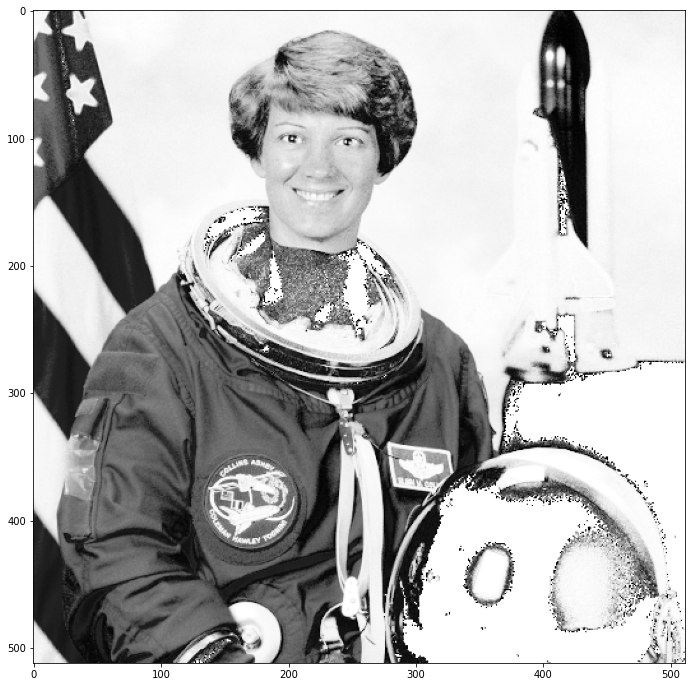

In [10]:
img_as_hsv = rgb_to_hsv(img)

# your code
plt.imshow(img_as_hsv[:,:,1], cmap='Greys')
plt.show()

Increase the saturation by a factor of 2, convert it back to RGB and plot the result.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


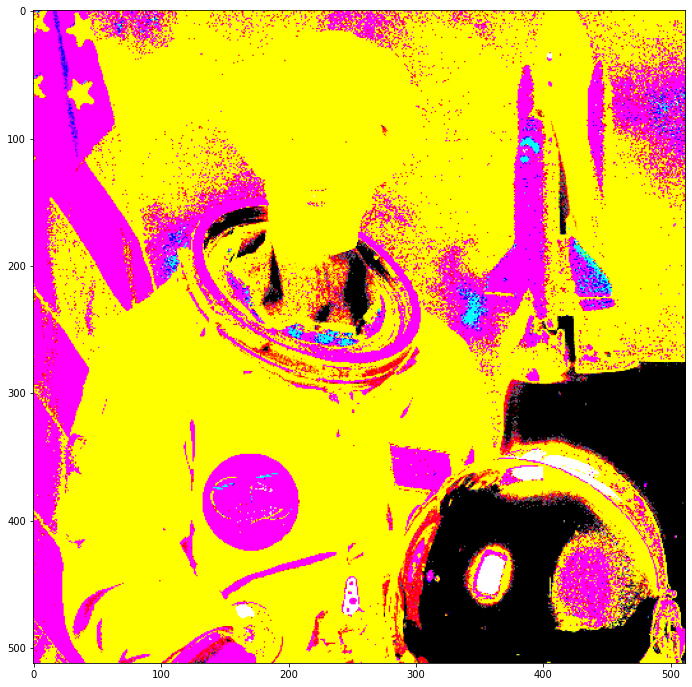

In [11]:
# your code
# increase saturation by factor 2
img_as_hsv[:,:,1] = img_as_hsv[:,:,1] * 2

# normalize saturation to range [0,1]
for i in range(0, img_as_hsv.shape[0]):
    for j in range(0, img_as_hsv.shape[1]):
        if img_as_hsv[i,j,1] > 1.:
            img_as_hsv[i,j,1] = 1.

img_as_rgb = hsv_to_rgb(img_as_hsv)

plt.imshow(img_as_rgb)
plt.show()

## Exercise 3 - Calculation [2 Points]

In the figure below you can see the [CIE-XYZ](https://de.wikipedia.org/wiki/CIE-Normvalenzsystem) color space.
![](https://upload.wikimedia.org/wikipedia/commons/4/49/CIE-Normfarbtafel.png)

What are the approximate x,y,z values for the following Adobe RGB colors:
* `(0, 0.5, 0.5)`
* `(0.33, 0.33, 0.33)`

A sodium-vapor lamp shines with double the intensity of a mercury-vapor lamp
. The light from the sodium lamp only contains 
the spectral line at `589,00nm` and the light from the mercury lamp only the
spectral line at `435,83 nm`.

What color does a human experience? What are the approximate x,y,z values?
